# Load Dataset

In [1]:
import numpy as np
import cv2
import os

In [2]:
dir = '../dataset/trainingSample/trainingSample/'
images = []
labels = []
for label in os.listdir(dir):
    for image in os.listdir(dir + label + '/'):
        images.append(cv2.imread(dir + label + '/' + image, cv2.IMREAD_GRAYSCALE))
        labels.append(int(label))
images = np.array(images)
images = images.reshape(images.shape[0], images.shape[1], images.shape[2], 1)
labels = np.array(labels)
labels = labels.reshape(labels.shape[0], 1)

# Load Model

In [3]:
autoencoder = cv2.dnn.readNetFromTensorflow('frozen_models/autoencoder_frozen_graph.pb')
encoder = cv2.dnn.readNetFromTensorflow('frozen_models/encoder_frozen_graph.pb')
decoder = cv2.dnn.readNetFromTensorflow('frozen_models/decoder_frozen_graph.pb')

# Inference

In [4]:
autoencoder.setInput(cv2.dnn.blobFromImage(images[15], 1 / 255., size=(28, 28), swapRB=True, crop=False))

In [5]:
result = autoencoder.forward()

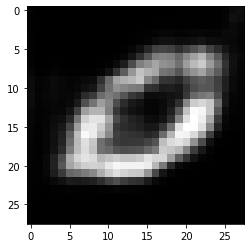

In [6]:
import matplotlib.pyplot as plt
plt.imshow(result.reshape(28, 28), cmap='gray')
plt.show()

In [7]:
encoder.setInput(cv2.dnn.blobFromImage(images[15], 1 / 255., swapRB=True, crop=False))
tmp = encoder.forward()
decoder.setInput(tmp)
result = decoder.forward()

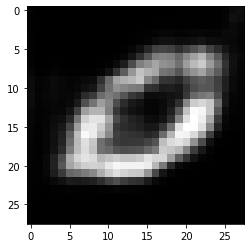

In [8]:
plt.imshow(result.reshape(28, 28), cmap='gray')
plt.show()